<a href="https://colab.research.google.com/github/WoradeeKongthong/object_detection_with_MaskRCNN/blob/master/object_detection_on_image_with_Mask_RCNN_and_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask R-CNN Object Detection on Image 

## Clone Mast-RCNN model with Tensorflow2

In [2]:
import os
if not os.path.isdir("./Mask-RCNN-TF2") :
  !git clone https://github.com/ahmedfgad/Mask-RCNN-TF2.git

## Install packages

In [3]:
!pip install -r Mask-RCNN-TF2/requirements.txt

## Import additional packages

In [2]:
import os
import random
import sys
import cv2
# from google.colab import files

## Import mrcnn

In [34]:
# set root directory to Mask_RCNN
ROOT_DIR = 'Mask-RCNN-TF2'

# add root dir to path
sys.path.append(ROOT_DIR) 

# import mrcnn
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
from mrcnn import utils

## Get class names of COCO dataset

In [7]:
# load the class label names from disk, one label per line
CLASS_NAMES = open(ROOT_DIR+"/samples/coco_labels.txt").read().strip().split("\n")

## Create pre-trained Mask R-CNN (trained on COCO Dataset)

### Create config

In [8]:
class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)


### Create model architecture

In [9]:
# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

### Load trained weights to the model

In [10]:
# Local path to save trained weights file
COCO_MODEL_PATH = os.path.join('.', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Load the weights into the model.
model.load_weights(filepath=COCO_MODEL_PATH, 
                   by_name=True)


... done downloading pretrained model!


## Run object detection on provided Matterport image

In [28]:
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

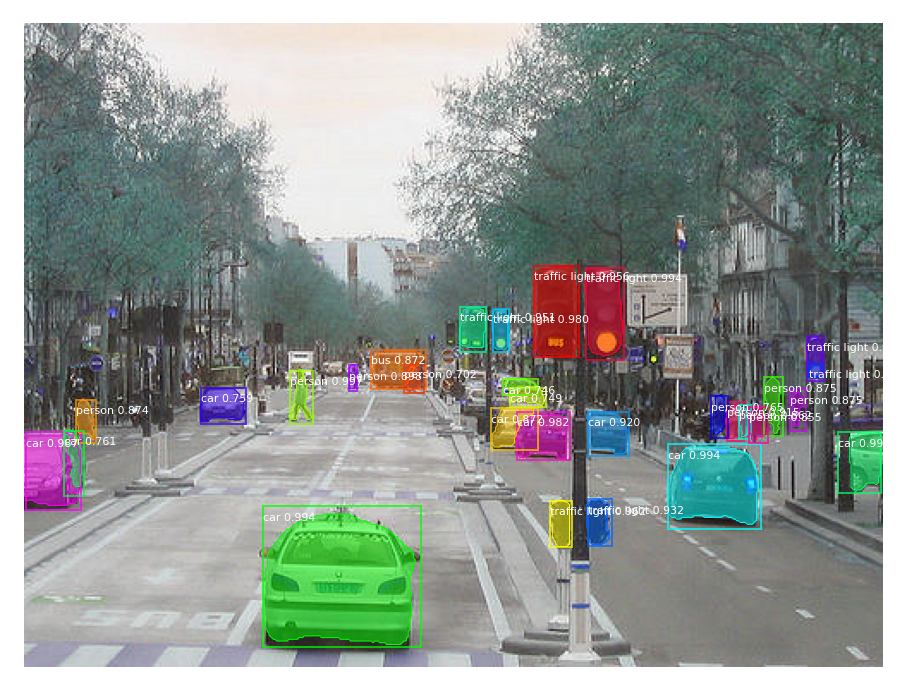

In [35]:
image = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Perform a forward pass of the network to obtain the results
r = model.detect([image])

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

# Run object detection on upload image

Saving family.png to family.png


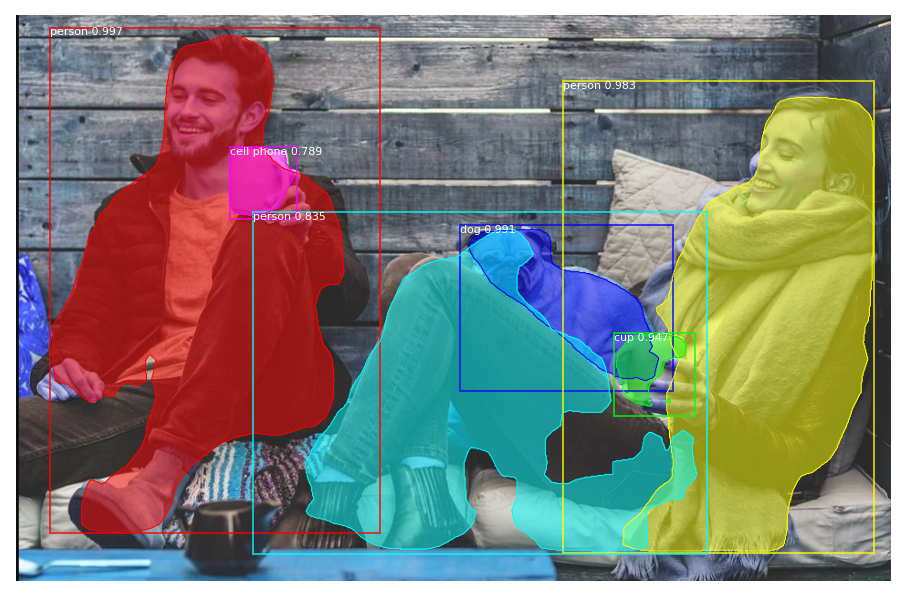

In [51]:
uploaded = files.upload()
image = cv2.imread(list(uploaded.keys())[0])

# Run detection
results = model.detect([image], verbose=0)
r = results[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])